In [ ]:
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.svm import SVC

In [2]:
df = pd.read_csv("../DataSet/GalaxyZooSDSSDataset.csv")
df.keys()

In [3]:
dfE = df[df.Type == "Elliptical"]
dfS = df[df.Type == "Spiral"]

Take a real astrophysical data set or generate random data with two classes and THREE features.

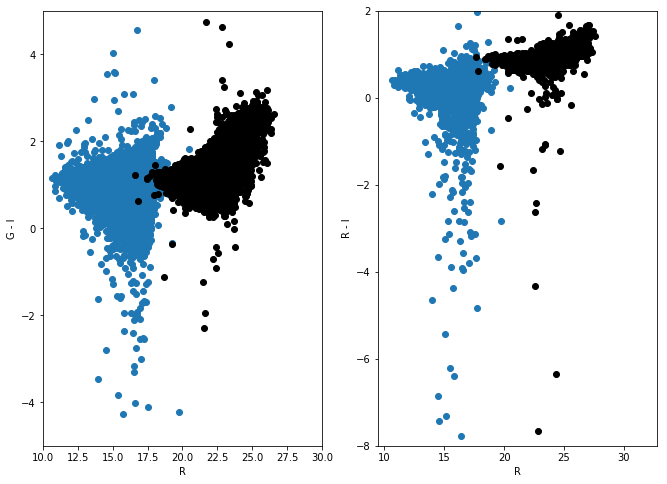

In [4]:
f, (ax,bx) = plt.subplots(1,2,figsize=(11,8))
ax.scatter(dfE.dered_r + 6,dfE.dered_g - dfE.dered_i,color="black",zorder =1)
ax.scatter(dfS.dered_r,dfS.dered_g - dfS.dered_i,zorder=0)
ax.set_ylim(-5,5); ax.set_xlim(10,30)
ax.set_ylabel("G - I"); ax.set_xlabel("R")

bx.scatter(dfE.dered_r + 7,dfE.dered_r - dfE.dered_i + .5,color="black",zorder =1)
bx.scatter(dfS.dered_r,dfS.dered_r - dfS.dered_i,zorder=0)
bx.set_ylim(-8,2); 
bx.set_ylabel("R - I"); bx.set_xlabel("R");

In [5]:
half = int(np.ceil(len(df.dered_r)/2))

data = np.zeros([len(df.dered_r[:half]),2])
data[:,0] = df.dered_r[:half] + 6 
data[:,1] = df.dered_g[:half] - df.dered_i[:half];

labels = df.Type[:half]

Plot the data set with decision boundary, margins, and label the support vectors from SVM.

In [6]:
svc = SVC(C= 1.0, kernel='rbf')

In [7]:
svc.fit(data,labels)

C:\Users\Betha\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)